In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Ovan importas allt som behövs

Under så tar vi in all data som behövs

In [15]:
csv_dir = "C:/Users/Phili/Desktop/fond/data/30 Min/SAND.csv"
data = pd.read_csv(csv_dir, header=0, index_col = 0, parse_dates = True, sep=";", names = ["Date", "close"])
data.head()

close = data["close"]#[data.index > "2018-03-01"]
signals = pd.DataFrame(data=close.values,index = close.index, columns=["close"])
signals.head()


,close
Date,
2019-02-21 15:00:00,152.70
2019-02-21 14:30:00,152.50
2019-02-21 14:00:00,152.65
2019-02-21 13:30:00,152.85
2019-02-21 13:00:00,153.25


Plotta det man vill plotta

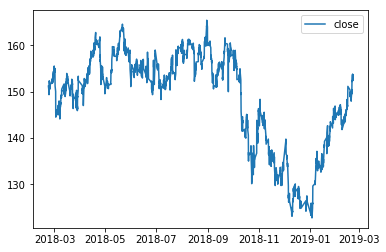

In [16]:
plt.plot(close, label="close")
plt.legend()

Det är här själva trading logiken finns. Det skapas en lista med där man har:
    1 = long
    -1 = short
    0 = ingen
"positions" är då man går in eller ut ur en position. 

In [112]:
#HÄR RÄKNAS GBM UT
def Brownian(N):                        
    dt = 1./N                                    # time step
    b = np.random.normal(0., 1., int(N))*np.sqrt(dt)  # brownian increments
    W = np.cumsum(b)                             # brownian path
    return W

def GBM(So, mu, sigma, N):    
    dt = 1/N
    W = Brownian(N)
    t = np.linspace(0, N, N)
    X = (mu-0.5*sigma**2)*t + sigma*W
    plt.plot(X)
    S = So*np.exp(X)
    return S
def gen_path(close,interval):
    i = interval
    prices = []
    path = []
    for price in close:
        prices.append(price)
        i-=1
        if i == 0:
            mu = np.mean(prices)
            sigma = np.std(prices)
            S = GBM(price, mu, sigma, interval)
            i = interval
            #prices = []
            for k in S:
                path.append(k)
    return path

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


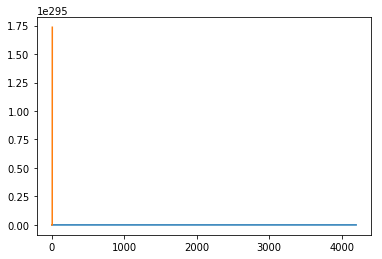

In [113]:
c = signals["close"]
length = len(c)
interval = 20

S = GBM(c[0], np.mean(c), np.std(c), len(c))
plt.plot(S)

In [5]:


signals["signal"][sw:] = np.where(woop), 1.0, 0.0)
signals["positions"] = signals["signal"].diff()


Här plottas signalerna, när man köpt osv.

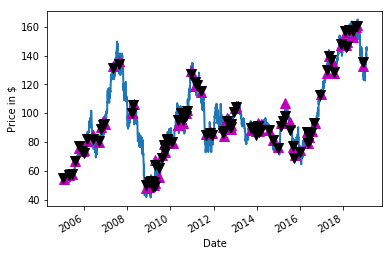

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111,  ylabel='Price in $')
#signals[['short', 'middle', "long"]].plot(ax=ax1, lw=2.)
signals["close"].plot(ax=ax1, lw=2.)


# Plot the buy signals
ax1.plot(signals.loc[signals["positions"] == 1.0].index, 
         signals.close[signals["positions"] == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals["positions"] == -1.0].index, 
         signals.close[signals["positions"] == -1.0],
         'v', markersize=10, color='k')

Här räknas returns ut. 

In [3]:
port = pd.DataFrame(index=close.index)
port["rets"] = close.pct_change().dropna()

port["total_rets"] = port["rets"]*signals["signal"]
port["equity_curve"] = (1.0 + port["total_rets"]).cumprod()
port["volatility"] = port["total_rets"].rolling(252).std()
plt.subplot(1,3,1)
plt.plot(port["equity_curve"])
plt.subplot(1,3,2)
plt.plot(port["total_rets"])
plt.subplot(1,3,3)
plt.plot(port["volatility"])

NameError: name 'close' is not defined